You are given a real estate dataset. 

The df is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression using the new data.

In this exercise, the dependent variable is 'price', while the independent variable is 'size'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Regression/SimpleLinearRegression/Examples/real_estate_price_size.csv')

In [3]:
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [5]:
x = df['size']
y = df['price']

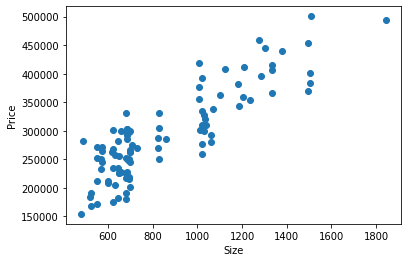

In [6]:
plt.scatter(x,y)
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

#### Linear regression with statsmodels

In [7]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           8.13e-31
Time:                        20:50:30   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

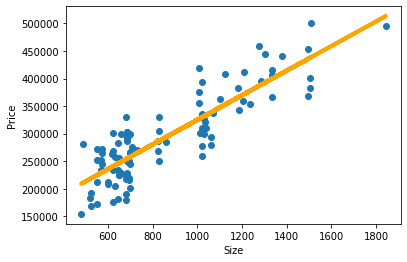

In [8]:
plt.scatter(x,y)
yhat = x*223.1787+101900
fig = plt.plot(x, yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

#### Linear regression with scikit learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
x = df['size']
y = df['price']

In [12]:
X = df['size'].values.reshape(-1,1)

reg.fit(X, y)

LinearRegression()

In [13]:
m = reg.coef_[0]
q = reg.intercept_

print(m)
print(q)

223.17874259460757
101912.60180122897


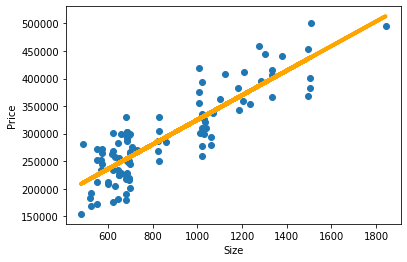

In [14]:
plt.scatter(x, y)
plt.plot(x, reg.predict(X), lw=4, c='orange', label ='regression line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

#### Train set and test set

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

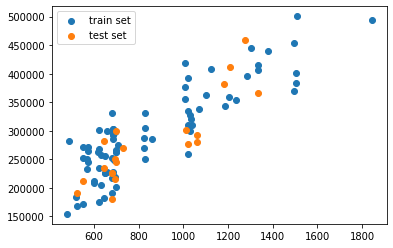

In [23]:
plt.scatter(X_train, y_train, label='train set')
plt.scatter(X_test, y_test, label='test set')
plt.legend()

In [24]:
reg = LinearRegression()

reg.fit(X_train, y_train)

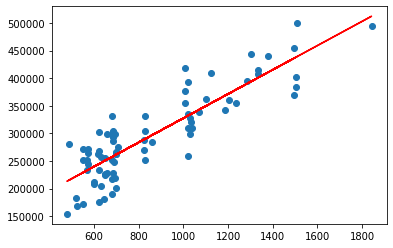

In [32]:
# prediction on train test
y_pred = reg.predict(X_train) 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')

In [34]:
from sklearn.metrics import r2_score
print("r2_score: {:.2f}".format(r2_score(y_train, y_pred)))

r2_score: 0.75


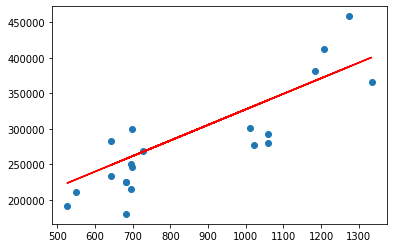

In [36]:
# prediction on test set
y_pred = reg.predict(X_test) 
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

In [37]:
from sklearn.metrics import r2_score
print("r2_score: {:.2f}".format(r2_score(y_test, y_pred)))

r2_score: 0.69
